In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 14
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.2
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[14_10_51_300_0.2_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[14_10_51_300_0.2_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.3315

Best Fitness:	1400.2713
Solution:	1400.0000
Diff:		0.2713

[0:02:30][----------] 1.96% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.3212

Best Fitness:	1400.2706
Solution:	1400.0000
Diff:		0.2706

[0:04:24][----------] 3.92% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.2715

Best Fitness:	1400.2437
Solution:	1400.0000
Diff:		0.2437

[0:06:30][#---------] 5.88% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.1285

Best Fitness:	1400.2236
Solution:	1400.0000
Diff:		0.2236

[0:08:25][#---------] 7.84% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.1818

Best Fitness:	1400.3099
Solution:	1400.0000
Diff:		0.3099

[0:10:09][#---------] 9.80% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.3042

Best Fitness:	1400.2265
Solution:	1400.0000
Diff:		0.2265

[0:12:14][#---------] 11.76% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.3335

Best Fitness:	1400.3366
Solution:	1400.0000
Diff:		0.3366

[0:14:09][#---------] 13.73% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.2671

Best Fitness:	1400.3408
Solution:	1400.0000
Diff:		0.3408

[0:16:14][##--------] 15.69% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.2348

Best Fitness:	1400.1621
Solution:	1400.0000
Diff:		0.1621

[0:18:12][##--------] 17.65% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.2337

Best Fitness:	1400.3990
Solution:	1400.0000
Diff:		0.3990

[0:20:25][##--------] 19.61% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.3835

Best Fitness:	1400.2747
Solution:	1400.0000
Diff:		0.2747

[0:22:25][##--------] 21.57% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.2523

Best Fitness:	1400.3138
Solution:	1400.0000
Diff:		0.3138

[0:24:26][##--------] 23.53% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.2527

Best Fitness:	1400.3152
Solution:	1400.0000
Diff:		0.3152

[0:26:25][###-------] 25.49% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.1496

Best Fitness:	1400.3072
Solution:	1400.0000
Diff:		0.3072

[0:28:16][###-------] 27.45% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.1404

Best Fitness:	1400.2961
Solution:	1400.0000
Diff:		0.2961

[0:30:17][###-------] 29.41% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.3339

Best Fitness:	1400.2868
Solution:	1400.0000
Diff:		0.2868

[0:32:22][###-------] 31.37% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.3005

Best Fitness:	1400.1609
Solution:	1400.0000
Diff:		0.1609

[0:34:18][###-------] 33.33% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.1963

Best Fitness:	1400.1560
Solution:	1400.0000
Diff:		0.1560

[0:36:07][####------] 35.29% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.3986

Best Fitness:	1400.1890
Solution:	1400.0000
Diff:		0.1890

[0:38:02][####------] 37.25% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.2160

Best Fitness:	1400.3060
Solution:	1400.0000
Diff:		0.3060

[0:39:34][####------] 39.22% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.2727

Best Fitness:	1400.2552
Solution:	1400.0000
Diff:		0.2552

[0:41:15][####------] 41.18% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.3038

Best Fitness:	1400.1659
Solution:	1400.0000
Diff:		0.1659

[0:42:49][####------] 43.14% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.2556

Best Fitness:	1400.2343
Solution:	1400.0000
Diff:		0.2343

[0:44:27][#####-----] 45.10% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.2740

Best Fitness:	1400.2139
Solution:	1400.0000
Diff:		0.2139

[0:46:04][#####-----] 47.06% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.3644

Best Fitness:	1400.3395
Solution:	1400.0000
Diff:		0.3395

[0:47:48][#####-----] 49.02% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.2717

Best Fitness:	1400.3108
Solution:	1400.0000
Diff:		0.3108

[0:49:39][#####-----] 50.98% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.2331

Best Fitness:	1400.2599
Solution:	1400.0000
Diff:		0.2599

[0:51:16][#####-----] 52.94% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.1676

Best Fitness:	1400.3393
Solution:	1400.0000
Diff:		0.3393

[0:52:59][#####-----] 54.90% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.2402

Best Fitness:	1400.2335
Solution:	1400.0000
Diff:		0.2335

[0:54:41][######----] 56.86% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.1921

Best Fitness:	1400.3294
Solution:	1400.0000
Diff:		0.3294

[0:56:28][######----] 58.82% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.1350

Best Fitness:	1400.2059
Solution:	1400.0000
Diff:		0.2059

[0:58:10][######----] 60.78% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.2366

Best Fitness:	1400.3788
Solution:	1400.0000
Diff:		0.3788

[0:59:42][######----] 62.75% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.2478

Best Fitness:	1400.2675
Solution:	1400.0000
Diff:		0.2675

[1:01:37][######----] 64.71% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.2295

Best Fitness:	1400.1703
Solution:	1400.0000
Diff:		0.1703

[1:03:28][#######---] 66.67% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.2105

Best Fitness:	1400.2398
Solution:	1400.0000
Diff:		0.2398

[1:05:07][#######---] 68.63% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.3412

Best Fitness:	1400.2426
Solution:	1400.0000
Diff:		0.2426

[1:06:42][#######---] 70.59% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.2748

Best Fitness:	1400.2676
Solution:	1400.0000
Diff:		0.2676

[1:08:22][#######---] 72.55% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.1741

Best Fitness:	1400.2726
Solution:	1400.0000
Diff:		0.2726

[1:09:55][#######---] 74.51% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.1139

Best Fitness:	1400.2530
Solution:	1400.0000
Diff:		0.2530

[1:11:37][########--] 76.47% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.2127

Best Fitness:	1400.3459
Solution:	1400.0000
Diff:		0.3459

[1:13:20][########--] 78.43% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.1742

Best Fitness:	1400.3466
Solution:	1400.0000
Diff:		0.3466

[1:14:47][########--] 80.39% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.2139

Best Fitness:	1400.2981
Solution:	1400.0000
Diff:		0.2981

[1:16:27][########--] 82.35% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.3763

Best Fitness:	1400.2113
Solution:	1400.0000
Diff:		0.2113

[1:18:07][########--] 84.31% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.2379

Best Fitness:	1400.3247
Solution:	1400.0000
Diff:		0.3247

[1:19:52][#########-] 86.27% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.1463

Best Fitness:	1400.2414
Solution:	1400.0000
Diff:		0.2414

[1:21:28][#########-] 88.24% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.2564

Best Fitness:	1400.2214
Solution:	1400.0000
Diff:		0.2214

[1:23:07][#########-] 90.20% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.3465

Best Fitness:	1400.2835
Solution:	1400.0000
Diff:		0.2835

[1:24:50][#########-] 92.16% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.2384

Best Fitness:	1400.3385
Solution:	1400.0000
Diff:		0.3385

[1:26:27][#########-] 94.12% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.1843

Best Fitness:	1400.3068
Solution:	1400.0000
Diff:		0.3068

[1:28:02][##########] 96.08% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.1798

Best Fitness:	1400.3287
Solution:	1400.0000
Diff:		0.3287

[1:29:54][##########] 98.04% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1401.2712

Best Fitness:	1400.1693
Solution:	1400.0000
Diff:		0.1693

[1:31:34][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

1:31:34

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
60,1.219067,2.431826,1.295562,1.52443,2.772558,0.936436,0.59445,0.690112,1.025285,2.230339,...,2.070969,1.850154,1.624735,1.170659,1.873122,0.880716,1.421145,2.050128,0.973378,50
61,1.219067,2.431826,1.295562,1.52443,2.772558,0.936436,0.59445,0.690112,1.025285,1.017034,...,2.070969,1.850154,1.624735,1.170659,1.873122,0.880716,1.421145,2.050128,0.973378,50
62,1.219067,2.431826,1.295562,1.52443,1.349724,0.936436,0.59445,0.690112,1.025285,1.017034,...,2.070969,1.850154,1.624735,1.170659,1.873122,0.880716,1.421145,2.050128,0.973378,50
63,1.219067,2.431826,1.295562,1.52443,1.349724,0.936436,0.59445,0.690112,1.025285,1.017034,...,2.070969,1.850154,1.624735,1.170659,1.873122,0.880716,1.421145,2.050128,0.973378,50
64,1.219067,2.431826,1.295562,1.52443,1.349724,0.936436,0.59445,0.690112,1.025285,1.017034,...,1.054925,1.850154,1.624735,1.170659,1.873122,0.880716,1.421145,2.050128,0.973378,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 0.2713322754343608

Best error for run 1: 0.2705568827598199

Best error for run 2: 0.24366796980416439

Best error for run 3: 0.22356649043149446

Best error for run 4: 0.3099310366944792

Best error for run 5: 0.22647374451662472

Best error for run 6: 0.3366203724242496

Best error for run 7: 0.34083032605781227

Best error for run 8: 0.16206005230401388

Best error for run 9: 0.3990348658921903

Best error for run 10: 0.2746611724480772

Best error for run 11: 0.31379424727128935

Best error for run 12: 0.3151514804071667

Best error for run 13: 0.30715686648227347

Best error for run 14: 0.2960667189133801

Best error for run 15: 0.28680056345092453

Best error for run 16: 0.16094299082851649

Best error for run 17: 0.156033201946002

Best error for run 18: 0.18900396374783668

Best error for run 19: 0.30601881613642945

Best error for run 20: 0.25524541964568925

Best error for run 21: 0.16587005170867997

Best error for run 22: 0.23430691897192446

Best error for run 23: 0.2138858138773685

Best error for run 24: 0.339499815166846

Best error for run 25: 0.31076561605550523

Best error for run 26: 0.25988260712938427

Best error for run 27: 0.3393319092924685

Best error for run 28: 0.23351336090672703

Best error for run 29: 0.3294250402752823

Best error for run 30: 0.20586795019062265

Best error for run 31: 0.37875195311266907

Best error for run 32: 0.2675357543230348

Best error for run 33: 0.17031842496544414

Best error for run 34: 0.2397869021144743

Best error for run 35: 0.24258764300225266

Best error for run 36: 0.2675626894388188

Best error for run 37: 0.27262530184407296

Best error for run 38: 0.2529923730703558

Best error for run 39: 0.345908433194154

Best error for run 40: 0.3465661848572381

Best error for run 41: 0.2980693407646413

Best error for run 42: 0.2113222554380627

Best error for run 43: 0.3246598792889017

Best error for run 44: 0.24142422065415303

Best error for run 45: 0.2213804986922696

Best error for run 46: 0.2834500495339398

Best error for run 47: 0.33847212138584837

Best error for run 48: 0.3068120325299333

Best error for run 49: 0.32865584205842424

Best error for run 50: 0.16933198571200592

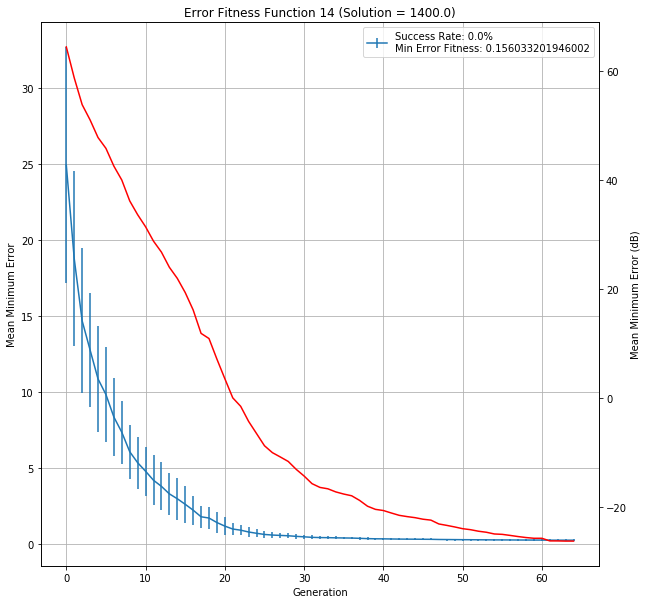

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[14_10_51_300_0.2_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,14,10,0.2,0.271332,0.270557,0.243668,0.223566,0.309931,0.226474,...,0.241424,0.22138,0.28345,0.338472,0.306812,0.328656,0.169332,0.270304,1:31:34,20100
